In [8]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load and preprocess data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Create priority levels based on tumor characteristics
# High priority (2): Malignant tumors with high severity features
# Medium priority (1): Borderline cases
# Low priority (0): Benign tumors
def assign_priority(target, mean_radius, mean_texture):
    if target == 1:  # Malignant
        if mean_radius > 15 or mean_texture > 20:
            return 2  # High priority
        else:
            return 1  # Medium priority
    else:  # Benign
        return 0  # Low priority

df['priority'] = df.apply(lambda x: assign_priority(
    x['target'], x['mean radius'], x['mean texture']), axis=1)

# Prepare features and target
X = df.drop(['target', 'priority'], axis=1)
y = df['priority']


Accuracy: 0.9649
F1-Score: 0.9653

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        64
           1       0.99      1.00      0.99        79
           2       0.85      1.00      0.92        28

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.95       171
weighted avg       0.97      0.96      0.97       171



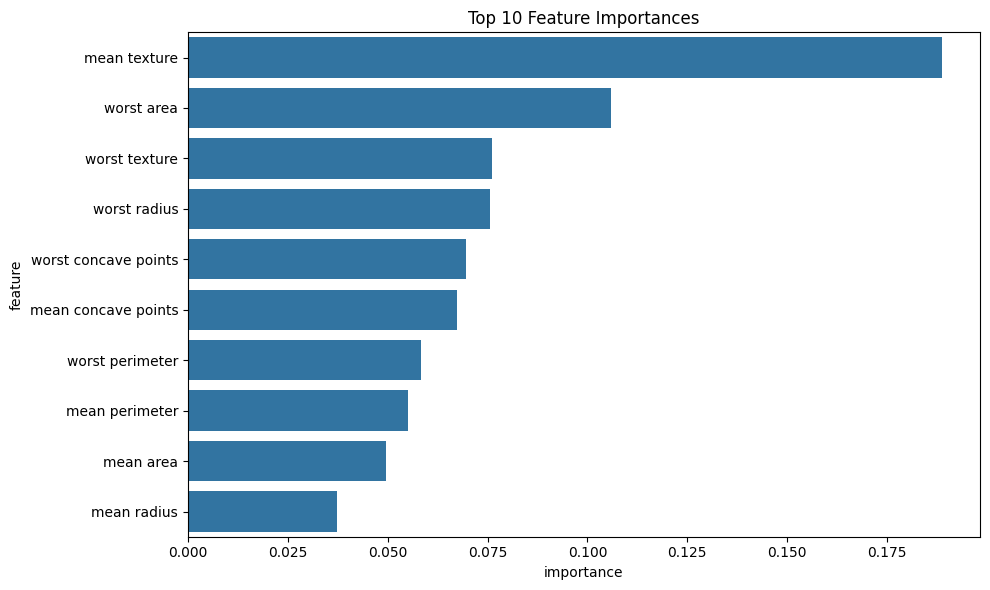

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()